<a href="https://colab.research.google.com/github/amaan-zafar/topic-modelling/blob/main/1_Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import lxml.html
from bs4 import BeautifulSoup 
from google.colab import files
import json

In [2]:
# To get a soup (html page) from a url
def get_soup(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")
  return soup

In [3]:
def get_text(soup):
  all_text = []
  for text in soup.find_all(['h1', 'h2', 'h3', 'h4', 'p']):
    if(text.has_attr('class')):
      if text['class'][0] == 'copyright':
        continue
    all_text.append(text.getText().strip())
  return ''.join(all_text)

Generating URLs for date 11th Jan to 14th Jan

In [4]:
date_urls = []
for i in range(1,15):
  if (i<10):
    date='0' + str(i)
  else:
    date=str(i)
  url = 'https://www.thehindu.com/archive/web/2021/01/' + date + '/'
  date_urls.append(url)
date_urls

['https://www.thehindu.com/archive/web/2021/01/01/',
 'https://www.thehindu.com/archive/web/2021/01/02/',
 'https://www.thehindu.com/archive/web/2021/01/03/',
 'https://www.thehindu.com/archive/web/2021/01/04/',
 'https://www.thehindu.com/archive/web/2021/01/05/',
 'https://www.thehindu.com/archive/web/2021/01/06/',
 'https://www.thehindu.com/archive/web/2021/01/07/',
 'https://www.thehindu.com/archive/web/2021/01/08/',
 'https://www.thehindu.com/archive/web/2021/01/09/',
 'https://www.thehindu.com/archive/web/2021/01/10/',
 'https://www.thehindu.com/archive/web/2021/01/11/',
 'https://www.thehindu.com/archive/web/2021/01/12/',
 'https://www.thehindu.com/archive/web/2021/01/13/',
 'https://www.thehindu.com/archive/web/2021/01/14/']

Getting urls of all links from each page from 11th to 14th Jan

In [5]:
flat_link_list = []
page_links_count = []

for url in date_urls:
  soup = get_soup(url)
  links_count = 0
  div_container = soup.find("div", class_="tpaper-container")
  sections = div_container.find_all("section")
  for section in sections:
    section_container = section.find("div", class_ = "section-container")
    li_list = section_container.find_all("li")
    for li in li_list:
      anchors = li.find_all("a", href=True)
      for a in anchors:
        flat_link_list.append(a['href'])
        links_count += 1
  page_links_count.append(links_count)

In [6]:
page_links_count

[431, 374, 323, 383, 397, 400, 448, 382, 396, 338, 366, 433, 416, 235]

In [7]:
print(len(flat_link_list))

5322


In [ ]:
p_list = []
for url in flat_link_list:
  article_soup = get_soup(url)
  p_text = get_text(article_soup)
  p_list.append(p_text)

In [ ]:
len(p_list)

1455

In [ ]:
p_list

In [ ]:
text_len_list = []
for i in range(len(p_list)):
  text_len_list.append(len(p_list[i]))
print(text_len_list)

[3844, 5544, 3188, 5365, 4503, 3850, 6656, 9143, 8810, 4485, 9440, 5317, 5788, 4537, 4102, 4345, 2587, 3043, 3080, 7611, 3884, 7382, 3142, 4034, 7360, 7701, 6089, 4550, 4063, 4900, 3655, 4825, 3219, 5082, 4703, 3332, 3625, 3376, 6113, 2529, 3647, 2467, 2372, 2275, 5347, 2743, 3462, 2298, 4295, 3980, 6841, 2436, 4939, 4164, 2831, 5554, 3376, 2727, 6513, 3279, 4922, 4081, 3475, 3201, 4408, 4055, 3681, 2541, 4171, 2735, 7514, 2514, 3468, 3854, 3345, 2618, 3806, 2657, 4662, 3541, 3175, 2267, 2871, 2103, 3187, 3009, 2149, 4431, 2705, 2946, 3528, 3217, 3411, 2200, 3119, 3824, 5354, 3071, 3296, 3450, 4152, 3840, 4273, 3960, 3905, 3367, 2454, 3426, 5217, 3170, 3734, 3823, 3041, 2608, 3287, 2417, 3592, 2996, 3435, 3960, 3422, 2468, 3503, 4299, 4709, 7718, 7196, 3121, 3367, 4728, 3771, 4564, 4471, 3151, 3441, 4261, 4659, 2685, 2690, 3228, 4011, 3236, 2963, 3591, 4586, 2814, 4061, 3556, 4664, 3782, 2917, 2710, 2056, 2905, 2514, 1563, 3191, 2631, 2510, 3698, 4367, 3210, 3982, 3513, 3737, 4985, 279

In [ ]:
filename_list = []
index = 0
for i in range(11,15):
  for j in range(page_links_count[index]):
    filename = 'thehindu_jan_' + str(i) + '_file_' + str(j+1) + '.json'
    filename_list.append(filename)
  index += 1
filename_list

['thehindu_jan_11_file_1.json',
 'thehindu_jan_11_file_2.json',
 'thehindu_jan_11_file_3.json',
 'thehindu_jan_11_file_4.json',
 'thehindu_jan_11_file_5.json',
 'thehindu_jan_11_file_6.json',
 'thehindu_jan_11_file_7.json',
 'thehindu_jan_11_file_8.json',
 'thehindu_jan_11_file_9.json',
 'thehindu_jan_11_file_10.json',
 'thehindu_jan_11_file_11.json',
 'thehindu_jan_11_file_12.json',
 'thehindu_jan_11_file_13.json',
 'thehindu_jan_11_file_14.json',
 'thehindu_jan_11_file_15.json',
 'thehindu_jan_11_file_16.json',
 'thehindu_jan_11_file_17.json',
 'thehindu_jan_11_file_18.json',
 'thehindu_jan_11_file_19.json',
 'thehindu_jan_11_file_20.json',
 'thehindu_jan_11_file_21.json',
 'thehindu_jan_11_file_22.json',
 'thehindu_jan_11_file_23.json',
 'thehindu_jan_11_file_24.json',
 'thehindu_jan_11_file_25.json',
 'thehindu_jan_11_file_26.json',
 'thehindu_jan_11_file_27.json',
 'thehindu_jan_11_file_28.json',
 'thehindu_jan_11_file_29.json',
 'thehindu_jan_11_file_30.json',
 'thehindu_jan_11_f

In [ ]:
len(filename_list)

1455

In [ ]:
import pandas as pd
df = pd.DataFrame(zip(filename_list, p_list, text_len_list),
               columns =['File Name', 'Scraped Text', 'Text Length'])
df.tail()

,File Name,Scraped Text,Text Length
1450,thehindu_jan_14_file_231.json,"Petrol, diesel prices hiked again, scale new h...",4881
1451,thehindu_jan_14_file_232.json,Rupee gains 11 paise to finish at 73.04 agains...,2944
1452,thehindu_jan_14_file_233.json,Rupee slips 3 paise to 73.18 against U.S. doll...,3523
1453,thehindu_jan_14_file_234.json,Sensex drops over 150 points in early trade; N...,4175
1454,thehindu_jan_14_file_235.json,View All CrosswordsSubscribe to The Hindu Cros...,3358


2.826638150289537


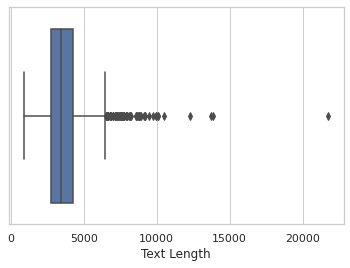

In [ ]:
print(df['Text Length'].skew())
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Text Length"])

In [ ]:
lower_cutoff = df['Text Length'].quantile(0.05)
upper_cutoff = df['Text Length'].quantile(0.95)

In [ ]:
drop_list = []
val = 0
for i in range(len(df)):
  val = df['Text Length'].values[i]
  if (val<lower_cutoff) or (val>upper_cutoff):
    drop_list.append(i)
for m in drop_list:  
  df.drop(m, inplace = True)

0.6336654835262382


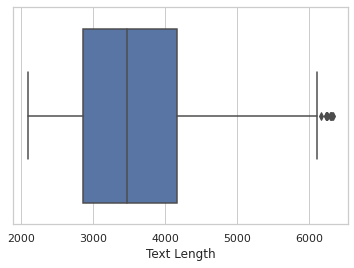

In [ ]:
print(df['Text Length'].skew())
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Text Length"])

In [ ]:
new_p_list = []
for i in range(len(df)):
  new_p_list.append(df['Scraped Text'].values[i])
new_p_list

In [ ]:
new_filename_list = []
for i in range(len(df)):
  new_filename_list.append(df['File Name'].values[i])

print(len(new_filename_list))
new_filename_list

1309


['thehindu_jan_11_file_1.json',
 'thehindu_jan_11_file_2.json',
 'thehindu_jan_11_file_3.json',
 'thehindu_jan_11_file_4.json',
 'thehindu_jan_11_file_5.json',
 'thehindu_jan_11_file_6.json',
 'thehindu_jan_11_file_10.json',
 'thehindu_jan_11_file_12.json',
 'thehindu_jan_11_file_13.json',
 'thehindu_jan_11_file_14.json',
 'thehindu_jan_11_file_15.json',
 'thehindu_jan_11_file_16.json',
 'thehindu_jan_11_file_17.json',
 'thehindu_jan_11_file_18.json',
 'thehindu_jan_11_file_19.json',
 'thehindu_jan_11_file_21.json',
 'thehindu_jan_11_file_23.json',
 'thehindu_jan_11_file_24.json',
 'thehindu_jan_11_file_27.json',
 'thehindu_jan_11_file_28.json',
 'thehindu_jan_11_file_29.json',
 'thehindu_jan_11_file_30.json',
 'thehindu_jan_11_file_31.json',
 'thehindu_jan_11_file_32.json',
 'thehindu_jan_11_file_33.json',
 'thehindu_jan_11_file_34.json',
 'thehindu_jan_11_file_35.json',
 'thehindu_jan_11_file_36.json',
 'thehindu_jan_11_file_37.json',
 'thehindu_jan_11_file_38.json',
 'thehindu_jan_1

In [ ]:
for i in range(len(new_filename_list)):
  dict = {}
  dict[new_filename_list[i]] = new_p_list[i]
  with open(new_filename_list[i], "w") as outfile: 
    json.dump(dict, outfile)

In [ ]:
import os 
import shutil
for file in new_filename_list:
  date = file.split('jan_')[1].split('_')[0]
  shutil.move(f"/content/{file}", f"/content/drive/MyDrive/JAN01-JAN14/Jan{date}")